#Código

In [198]:
# Inicializção das bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

##1 Importar o dataset de *Breast Cancer Data Set*: https://archive.ics.uci.edu/ml/datasets/breast+cancer ;

In [332]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data"
df = pd.read_csv(url)

##2 Nomear as colunas de acordo com o arquivo **breast-cancer.names**;

In [335]:
header=["class","age","menopause","tumor-size","inv-nodes","node-caps","deg-malig","breast","breast-quad","irradiant"]
df = pd.read_csv(url, header=None, names=header)
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiant
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


##3 Criar um subdataframe contendo apenas o conteúdo das colunas *Class*, *age*, *menopause* e *tumor-size*;

In [336]:

sub_df=pd.DataFrame(df,columns=["class","age","menopause","tumor-size"])

In [337]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       286 non-null    object
 1   age         286 non-null    object
 2   menopause   286 non-null    object
 3   tumor-size  286 non-null    object
dtypes: object(4)
memory usage: 9.1+ KB


##4 Vizualisar os dados utilizando, pelo menos, head() and pairplot().

In [338]:
df.head(10)

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiant
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
5,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
6,no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no
7,no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no
8,no-recurrence-events,40-49,premeno,50-54,0-2,no,2,left,left_low,no
9,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no


###Identificando variações das colunas

In [339]:
#Class
cl=df["class"].unique()
cl.sort()
cl

array(['no-recurrence-events', 'recurrence-events'], dtype=object)

In [340]:
#Age
ag=df["age"].unique()
ag.sort()
ag

array(['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'], dtype=object)

In [341]:
#Menopause
mn=df["menopause"].unique()
mn.sort()
mn

array(['ge40', 'lt40', 'premeno'], dtype=object)

In [342]:
#Tumor Size
ts=df["tumor-size"].unique()
ts.sort()
ts

array(['0-4', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
       '40-44', '45-49', '5-9', '50-54'], dtype=object)

In [343]:
#Inv Nodes
i_n=df["inv-nodes"].unique()
i_n.sort()
i_n

array(['0-2', '12-14', '15-17', '24-26', '3-5', '6-8', '9-11'],
      dtype=object)

In [353]:
#Node Caps
nc=df["node-caps"].unique()
nc.sort()
nc

array(['no', 'yes'], dtype=object)

In [347]:
#Transformando valores indefinidos em Null
df["node-caps"]=df["node-caps"].replace("?",np.nan)

In [313]:
#Deg Malig
dm=df["deg-malig"].unique()
dm.sort()
dm

array([1, 2, 3])

In [316]:
#breast
br=df["breast"].unique()
br.sort()
br

array(['left', 'right'], dtype=object)

In [352]:
#Breast Quad
bq=df["breast-quad"].unique()
bq.sort()
bq

array(['central', 'left_low', 'left_up', 'right_low', 'right_up'],
      dtype=object)

In [349]:
#Transformando valores indefinidos em Null
df["breast-quad"]=df["breast-quad"].replace("?",np.nan)

In [350]:
#Irradiant
ir=df["irradiant"].unique()
ir.sort()
ir

array(['no', 'yes'], dtype=object)

In [351]:
#Excluindo valores nulos
df.dropna(inplace=True)

###Tratando variações

In [355]:
#Tratando valores dos dados
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [356]:
df["class"] = le.fit_transform(df["class"])
df["age"] = le.fit_transform(df["age"])
df["menopause"] = le.fit_transform(df["menopause"])
df["tumor-size"] = le.fit_transform(df["tumor-size"])
df["inv-nodes"] = le.fit_transform(df["inv-nodes"])
df["node-caps"] = le.fit_transform(df["node-caps"])
df["breast"] = le.fit_transform(df["breast"])
df["breast-quad"] = le.fit_transform(df["breast-quad"])
df["irradiant"] = le.fit_transform(df["irradiant"])

df.head(10)

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiant
0,0,1,2,5,0,0,3,0,1,0
1,0,2,2,3,0,0,2,1,4,0
2,0,2,2,3,0,0,2,0,1,0
3,0,4,0,2,0,0,2,1,2,0
4,0,2,2,0,0,0,2,1,3,0
5,0,4,0,2,0,0,2,0,1,0
6,0,3,2,4,0,0,2,0,1,0
7,0,4,0,3,0,0,1,0,1,0
8,0,2,2,10,0,0,2,0,1,0
9,0,2,2,3,0,0,2,1,2,0


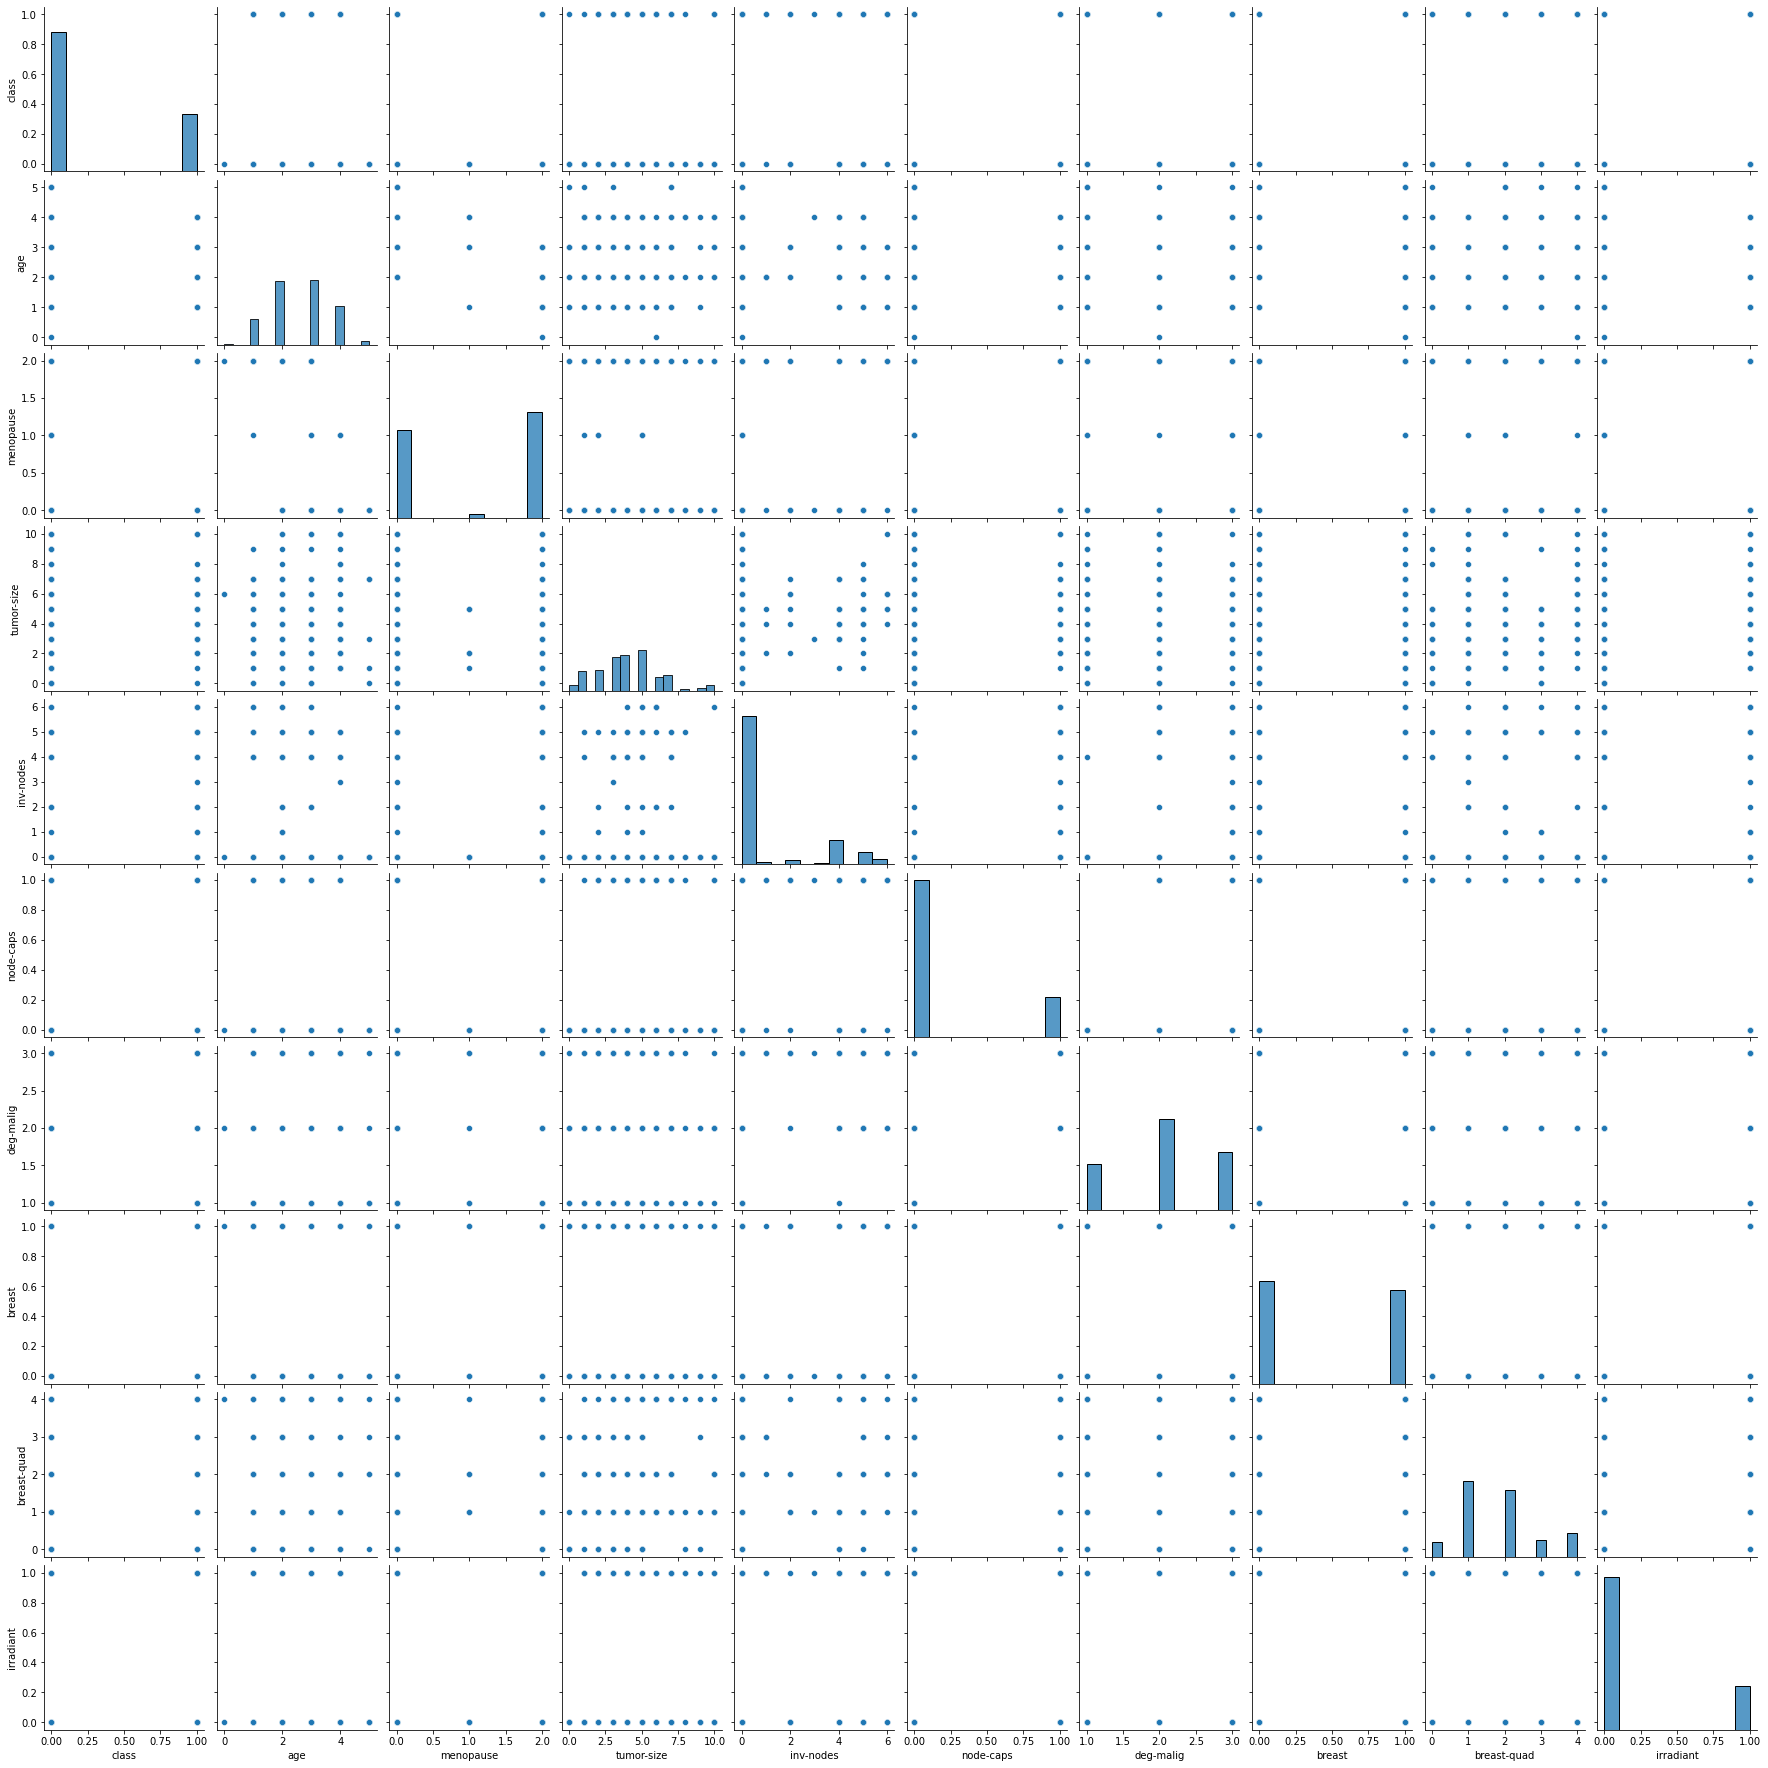

In [357]:
sns.pairplot(df)
plt.show()

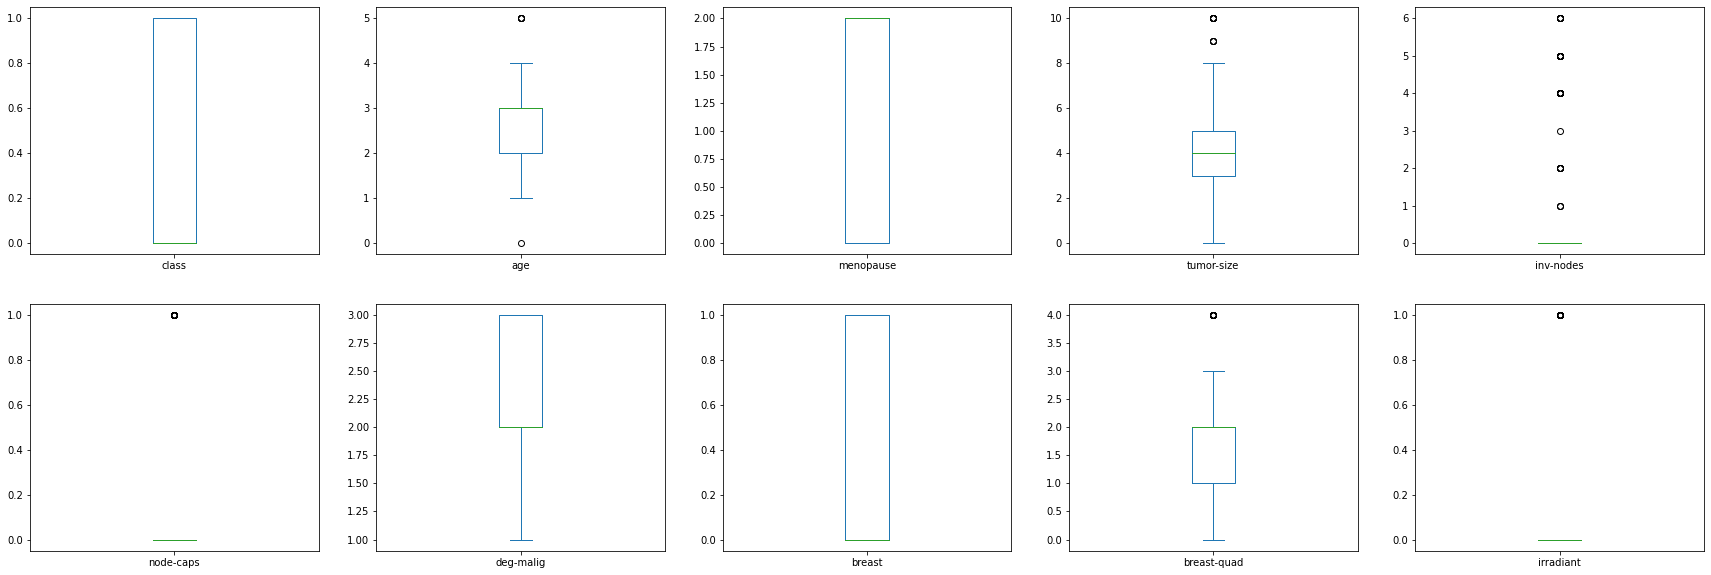

In [358]:
df.plot(kind='box', subplots=True, layout=(2,5), sharex=False, sharey=False, figsize=(30, 10))
plt.show()

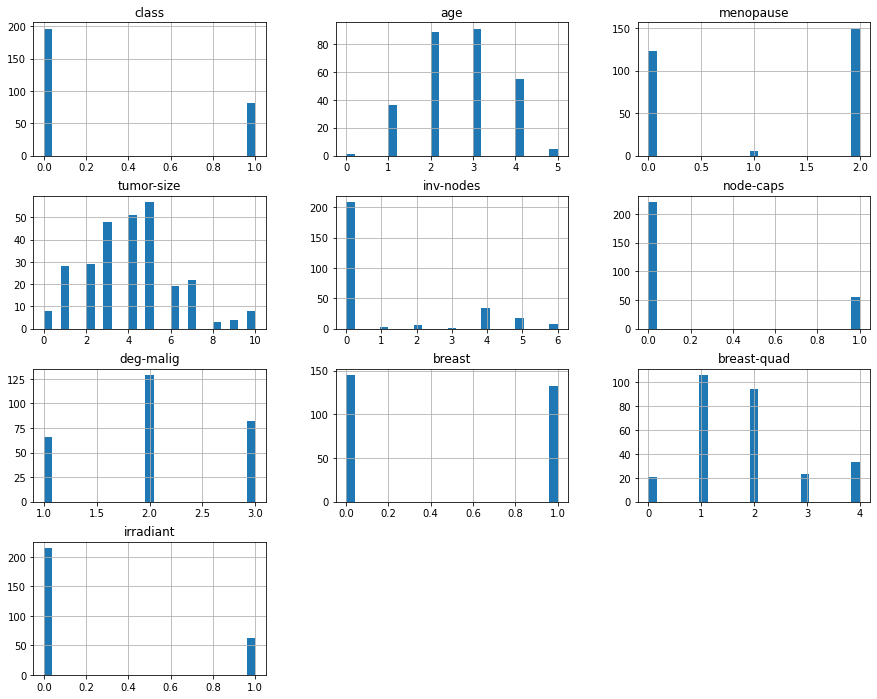

In [359]:
df.hist(bins=25, figsize=(15, 12))
plt.show()

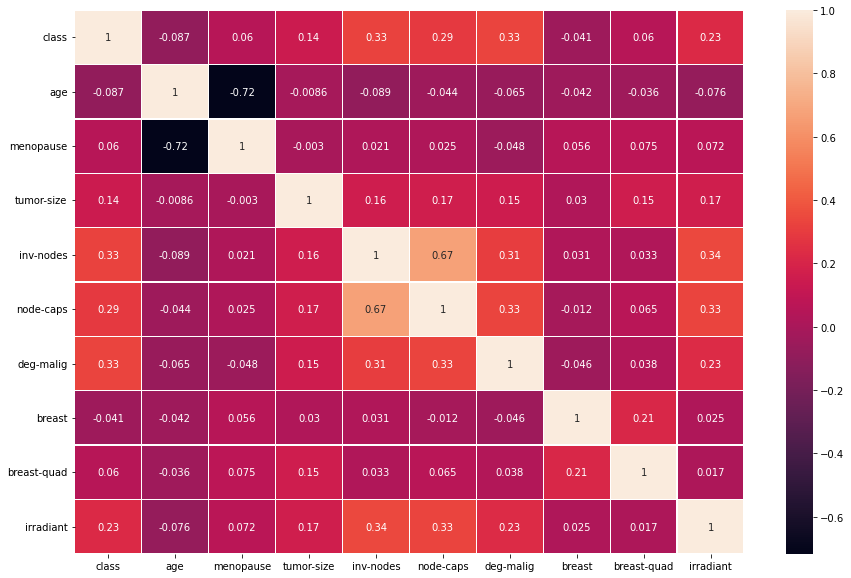

In [360]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True,linewidths=.5)
plt.show()

###Conclusões

* Um pouco mais de 66% dos casos de câncer não apresentam reincidência, indicando uma boa eficácia do tratamento;
* Os quadrantes de maior incidência dos nódulos são as regiões "central" e "inferior-esquerdo";
* Cerca de 80% dos casos realizaram radioterapia, sendo o tratamento mais utilizado;
* Há uma distribuição muito próxima da aparição do câncer entre os peitos esquerdo e direto, não havendo uma têndencia significativa;
* Há uma grande incidência de casos em mulheres que não sofreram menopausa ou que ou que sofreram depois dos 40 anos;
* O grau de malignidade mais comum é o de grau 2, tendo cerca de 50% de incidência.
